https://www.youtube.com/playlist?list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO
https://dagshub.com/alberto.otano/curso-series-temporales/src/master


las series temporales no son procesos Markov porque los valores futuros dependen de varios estados pasados, los procesos Markov dependen solo del estado actual. Por eso para series temporales, los modelos usan varios lags.

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_csv_data = pd.read_csv('data/Index2018.csv')

In [3]:
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [7]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [8]:
df_comp.spx.isna().sum()

np.int64(0)

In [9]:
import matplotlib.pyplot as plt

<Axes: >

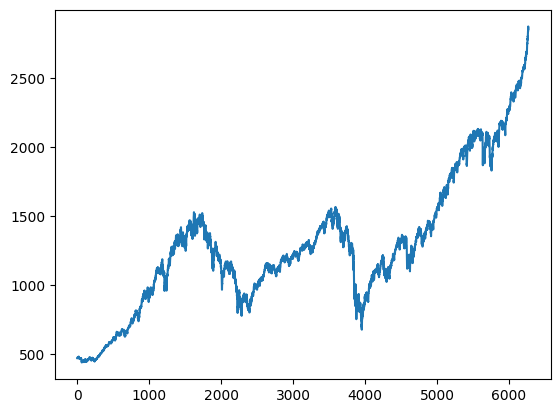

In [10]:
df_comp.spx.plot()

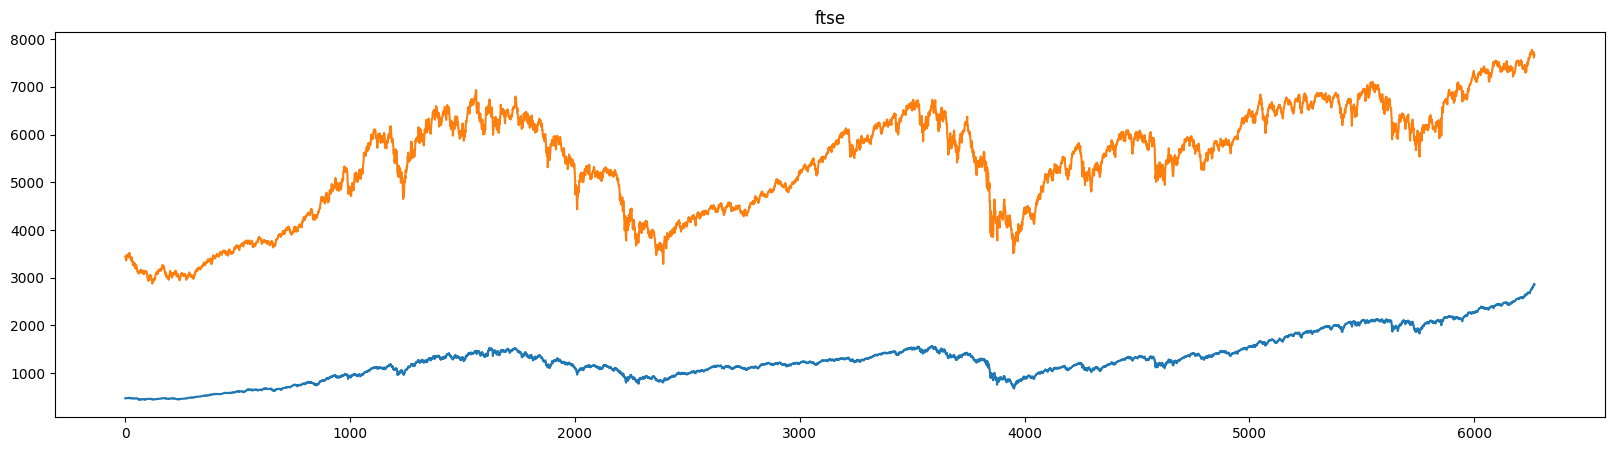

In [11]:
df_comp['spx'].plot(figsize=(20,5), title='spx')
df_comp['ftse'].plot(figsize=(20,5), title='ftse')
plt.show()

### QQ plot

In [12]:
import scipy.stats
import pylab

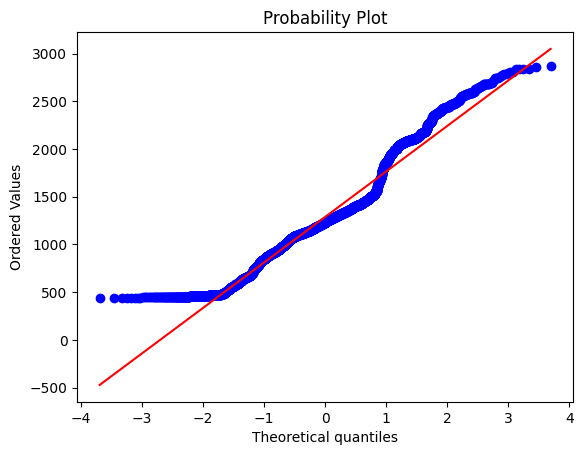

In [13]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

si siguen la línea roja es que es distribución normal, pero como se espera de una serie temporal, no lo es

### datetime index

In [14]:
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst = True)

In [15]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [16]:
df_comp['date'] .describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

### datetime index

In [17]:
df_comp.set_index('date', inplace = True)

In [18]:
df_comp.asfreq('d')
#d es días naturales, genera nulos para los días no laborables

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [19]:
df_comp.asfreq('b')

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [20]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### tratando nulos

In [21]:
df_comp.spx = df_comp.spx.ffill()

In [22]:
df_comp.ftse = df_comp.ftse.bfill()

In [23]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [24]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

### simplificando el dataset

In [25]:
df_comp['market_value']= df_comp.spx

In [26]:
del df_comp['spx']

In [27]:
del df_comp['dax'], df_comp['nikkei'],df_comp['ftse']

### split data

In [28]:
size = int(len(df_comp)*0.8)

In [29]:
df = df_comp[:size]

In [30]:
df_test = df_comp[size:]

In [31]:
df.tail()

,market_value
date,
2013-03-28,1569.185872
2013-03-29,1569.185872
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [32]:
df_test.head()

,market_value
date,
2013-04-04,1559.979316
2013-04-05,1553.278930
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827


### estacionariedad

In [33]:
rw = pd.read_csv('data/RandWalk.csv')
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [34]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index('date', inplace = True)
rw.asfreq('b')

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255
...,...
2013-04-01,2263.675474
2013-04-02,2225.000870
2013-04-03,2190.787688


In [35]:
df['rw'] = rw.price

C:\Users\flipe\AppData\Local\Temp\ipykernel_9220\818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [36]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [37]:
df['wn'] = wn

C:\Users\flipe\AppData\Local\Temp\ipykernel_9220\672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [38]:
df.describe()

,market_value,rw,wn
count,5015.000000,5015.000000,5015.000000
mean,1091.357559,1269.225170,1094.831970
std,292.487977,443.848312,292.214098
min,438.920000,585.483034,-7.937447
25%,914.608917,931.378676,900.359573
50%,1144.581490,1155.823875,1096.573087
75%,1315.996494,1487.630701,1297.043219
max,1570.252238,2715.508720,2037.537307


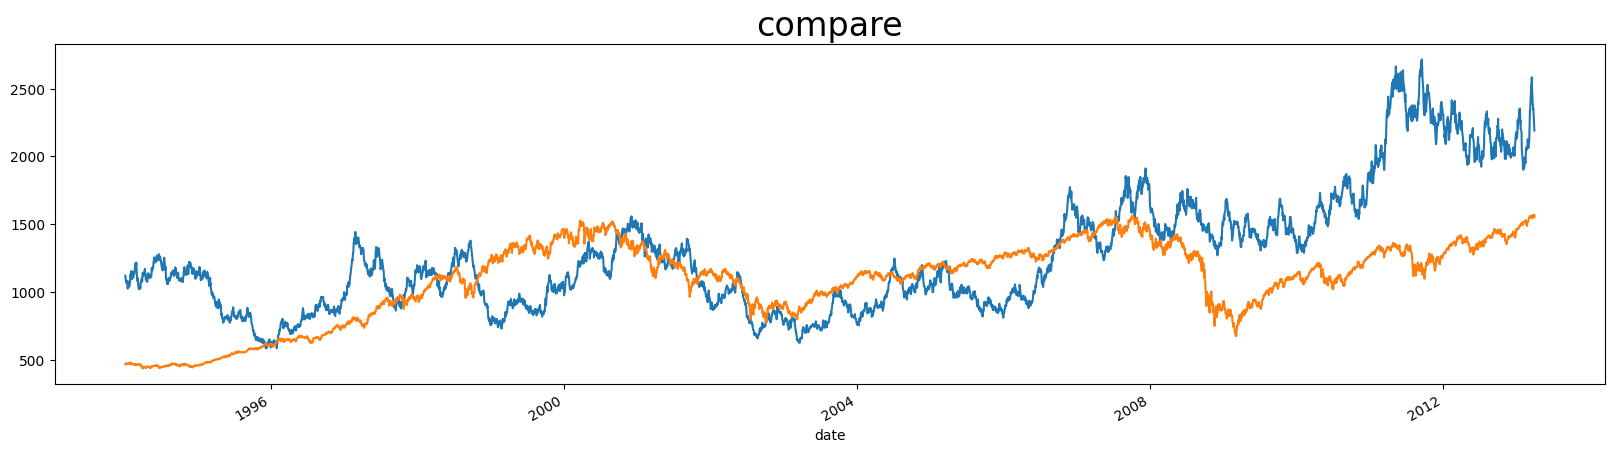

In [39]:
df.rw.plot(figsize=(20,5))
df.market_value.plot(figsize=(20,5))
plt.title("compare", size= 24)
plt.show()

### dicky fuller test

In [40]:
#import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 

In [41]:
sts.adfuller(df.market_value)

(np.float64(-1.7341463076798178),
 np.float64(0.41361066122334306),
 18,
 4996,
 {'1%': np.float64(-3.4316595802782865),
  '5%': np.float64(-2.8621186927706463),
  '10%': np.float64(-2.567078038881065)},
 np.float64(39862.6025921832))

In [42]:
sts.adfuller(df.wn)

(np.float64(-69.95392790968074),
 0.0,
 0,
 5014,
 {'1%': np.float64(-3.4316548765428174),
  '5%': np.float64(-2.8621166146845334),
  '10%': np.float64(-2.5670769326348926)},
 np.float64(70704.02212511947))

In [43]:
sts.adfuller(df.rw)

(np.float64(-1.2749014535858882),
 np.float64(0.6405752915257533),
 24,
 4990,
 {'1%': np.float64(-3.4316611557350547),
  '5%': np.float64(-2.862119388798601),
  '10%': np.float64(-2.5670784094039782)},
 np.float64(46239.12819549595))

### seasonality

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

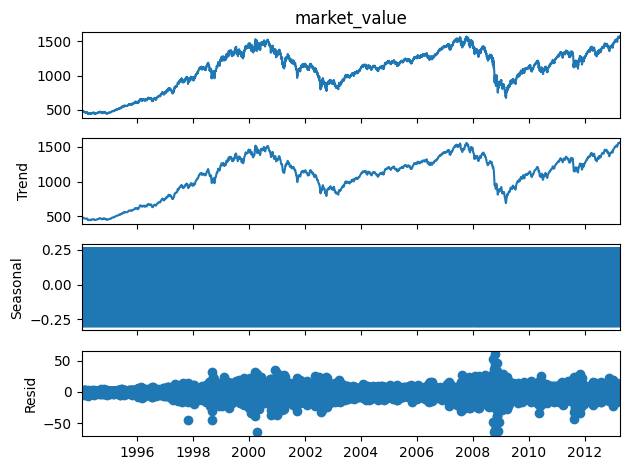

In [53]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive", period=5) # añadir period porque si no da error, las versiones antiguas de statsmodels cogían un valor por defecto
s_dec_additive.plot()
plt.show()

In [50]:
import statsmodels
print(statsmodels.__version__)

0.14.4


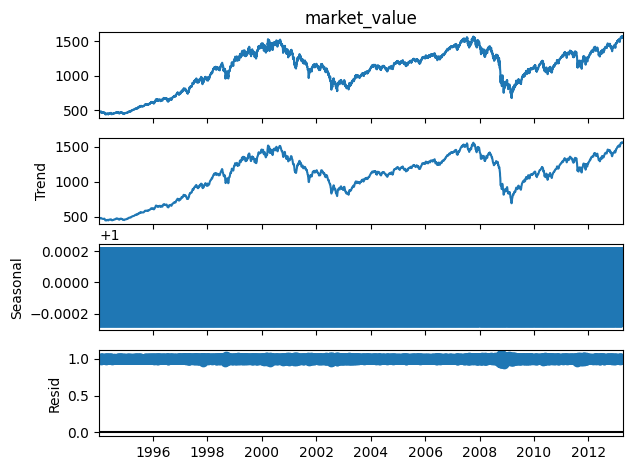

In [54]:
s_dec_additive = seasonal_decompose(df.market_value, model = "multiplicative", period=5) # añadir period porque si no da error, las versiones antiguas de statsmodels cogían un valor por defecto
s_dec_additive.plot()
plt.show()